# **STROKE DATA ANALYSIS**
This is the dataset        https://drive.google.com/file/d/1JcqDBxq0D9a_hR1pP36SF159DmJvFU_k/view

## **Specific Objectives:**

I. **Identify Demographic Trends**
   Explore and analyze demographic factors such as age, gender, marital status, and residence type to identify any trends or patterns related to strokes.

II. **Assess Health Metrics Impact**
    Investigate the impact of health metrics, including hypertension, heart disease, average glucose level, and BMI, on the occurrence of strokes.

III. **Evaluate Lifestyle Factors**
     Examine lifestyle factors, specifically smoking status and work type, to understand their association with strokes.

IV. **Explore Correlations**
    Conduct correlation analysis to identify relationships between different health conditions (hypertension, heart disease) and understand their potential collective influen on strokes.
 on strokes.


In [25]:
# Data manipulation and analysis
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Load the data 
df = pd.read_csv('./stroke_data.csv')

## DATA INSPECTION

1. **Preview rows of the dataset.**
2. **Check for data types of each column.**
3. **Check for missing values in each column.**
4. **Check data shape.**
5. **Check column names.**
6. **Explore unique values in categorical columns.**
7. **Explore summary statistics for numeric columns.**
8. **Check for duplicates.**
9. **Outliers**

In [26]:
# 1. Preview rows of the dataset 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [27]:
# 2.Display data types of each column
print("Original Data Types:")
print(df.dtypes)

Original Data Types:
id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [28]:
# 3. Count missing values in each column
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [29]:
# 4.Display the shape of the DataFrame
data_shape = df.shape
print("Number of Rows:", data_shape[0])
print("Number of Columns:", data_shape[1])

Number of Rows: 5110
Number of Columns: 12


In [30]:
#5 .Display column names
column_names = df.columns
print("Column Names:")
print(column_names)

Column Names:
Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')


In [31]:
# 6 .Checking for uniques values in all columns 
# Loop through each column and print unique values
for column_name in df.columns:
    unique_values = df[column_name].unique()
    print(f"Unique Values in '{column_name}':")
    print(unique_values)
    print("\n" + "="*50 + "\n")  # Separating output for each column

Unique Values in 'id':
[ 9046 51676 31112 ... 19723 37544 44679]


Unique Values in 'gender':
['Male' 'Female' 'Other']


Unique Values in 'age':
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e

In [32]:
# 7.Display summary statistics for numeric columns(mean,std,max,min etc)
numeric_summary = df.describe()
print("Summary Statistics for Numeric Columns:")
print(numeric_summary)

Summary Statistics for Numeric Columns:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%

In [33]:
# 8.Check for duplicate rows
duplicate_rows = df[df.duplicated()]

# Count the number of duplicate rows
num_duplicate_rows = len(duplicate_rows)

# Output the number of duplicate rows
print("Number of Duplicate Rows:", num_duplicate_rows)

# Display the duplicate rows
if num_duplicate_rows > 0:
    print("\nDuplicate Rows:")
    print(duplicate_rows)

Number of Duplicate Rows: 0


In [34]:
# 9.Outliers 
# Numeric columns for outlier detection 'age', 'hypertension', 'heart_disease', 'avg_glucose_level', and 'bmi'.
numeric_columns = ['age',  'avg_glucose_level', 'bmi']

# Loop through each numeric column
for column in numeric_columns:
    # Calculate IQR
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1

    # Identify outliers using IQR
    outliers = (df[column] < (q1 - 1.5 * iqr)) | (df[column] > (q3 + 1.5 * iqr))

    # Display the rows with outliers
    print(f"Rows with Outliers in '{column}':")
    print(df[outliers])
    print("\n" + "="*50 + "\n")  # Separating output for each column


Rows with Outliers in 'age':
Empty DataFrame
Columns: [id, gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status, stroke]
Index: []


Rows with Outliers in 'avg_glucose_level':
         id  gender   age  hypertension  heart_disease ever_married  \
0      9046    Male  67.0             0              1          Yes   
1     51676  Female  61.0             0              0          Yes   
3     60182  Female  49.0             0              0          Yes   
4      1665  Female  79.0             1              0          Yes   
5     56669    Male  81.0             0              0          Yes   
...     ...     ...   ...           ...            ...          ...   
5061  38009    Male  41.0             0              0          Yes   
5062  11184  Female  82.0             0              0          Yes   
5063  68967    Male  39.0             0              0          Yes   
5064  66684    Male  70.0             0      

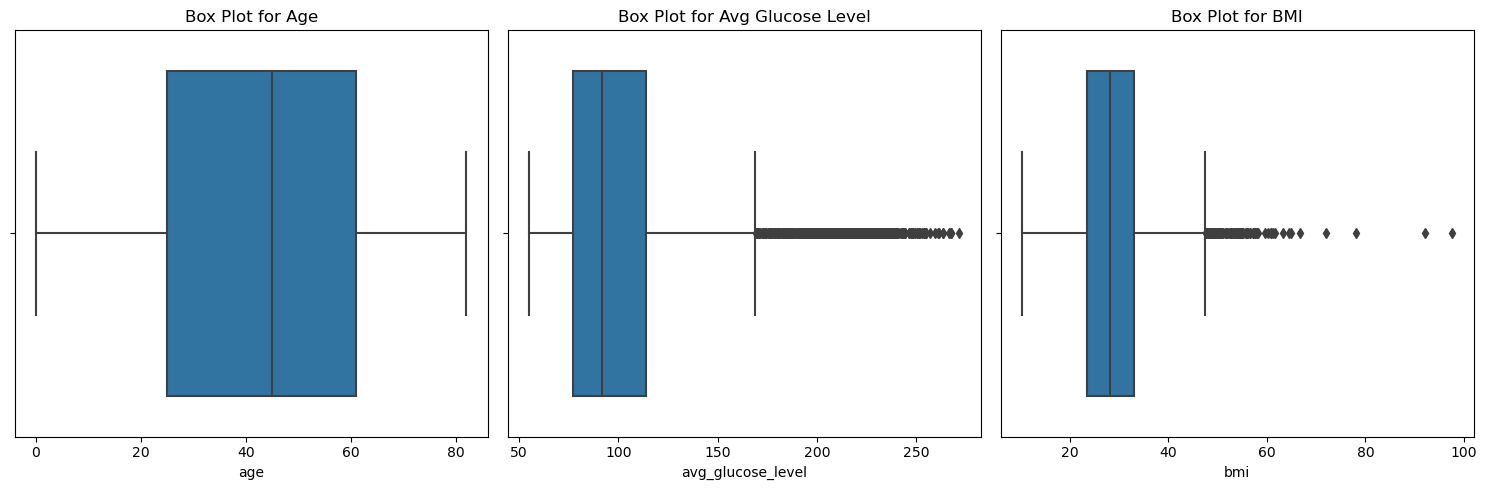

In [35]:
# 9. outlier plot 
# Set up the figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Box plot for 'age'
sns.boxplot(x=df['age'], ax=axes[0])
axes[0].set_title('Box Plot for Age')

# Box plot for 'avg_glucose_level'
sns.boxplot(x=df['avg_glucose_level'], ax=axes[1])
axes[1].set_title('Box Plot for Avg Glucose Level')

# Box plot for 'bmi'
sns.boxplot(x=df['bmi'], ax=axes[2])
axes[2].set_title('Box Plot for BMI')

# Adjust layout
plt.tight_layout()
plt.show()

# DATA CLEANING 
**1.Handling Missing Values**

**2.Convert Data Types**

**3.Handling Outliers**

**4.Ensure consistency and accuracy across columns.**

**5.Display final dataset**


In [36]:
# 1.Handling the missing values ( bmi 201 )
# Calculate the mean of the 'bmi' column
bmi_mean = df['bmi'].mean()

# Fill missing values in 'bmi' with the mean
df['bmi'].fillna(bmi_mean, inplace=True)

# check for any remaining missing values
missing_values_after_cleaning = df.isnull().sum()

# Print the result
print("Missing Values per Column after cleaning:")
print(missing_values_after_cleaning)


Missing Values per Column after cleaning:
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [37]:
#2.Convert Datatypes 

# Identify non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=['int64', 'float64']).columns

# Convert non-numeric columns to numeric 
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # 'coerce' converts non-convertible values to NaN


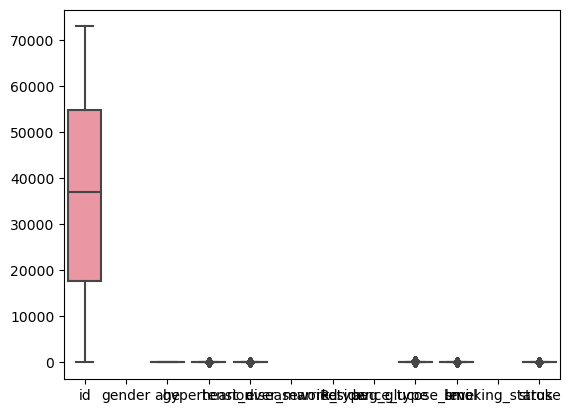

In [38]:
#3.Handling Outliers 
sns.boxplot(data=df)
plt.show()

In [39]:
# Remove rows with outliers
df_no_outliers = df[~outliers]


In [40]:
# Replace outliers with the median
df_imputed = df.copy()
df_imputed[outliers] = df.median()


In [41]:
df.dtypes

id                     int64
gender               float64
age                  float64
hypertension           int64
heart_disease          int64
ever_married         float64
work_type            float64
Residence_type       float64
avg_glucose_level    float64
bmi                  float64
smoking_status       float64
stroke                 int64
dtype: object